In [1]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from axessettings import AxesSetting, linear_sim, linear_approx

In [2]:
V_0 = 19.98
R_L = 19.81e3

In [3]:
data = pd.read_excel("data.xlsx", sheet_name="(3)", skiprows=[0, 2], header=[0])
data.sort_values(by="V_GS", axis=0, inplace=True, ascending=True)
data["I_D"] = (V_0 - data["V_DS"])/R_L
data

,V_GS,V_DS,I_D
0,0.00,0.559,0.000980
6,0.10,0.638,0.000976
18,0.15,0.686,0.000974
7,0.20,0.740,0.000971
8,0.30,0.953,0.000960
9,0.40,2.166,0.000899
19,0.45,3.675,0.000823
1,0.50,5.080,0.000752
20,0.55,6.790,0.000666
10,0.60,8.216,0.000594


 27.13


/tmp/ipykernel_504085/1691894191.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(-ax.get_xticks())


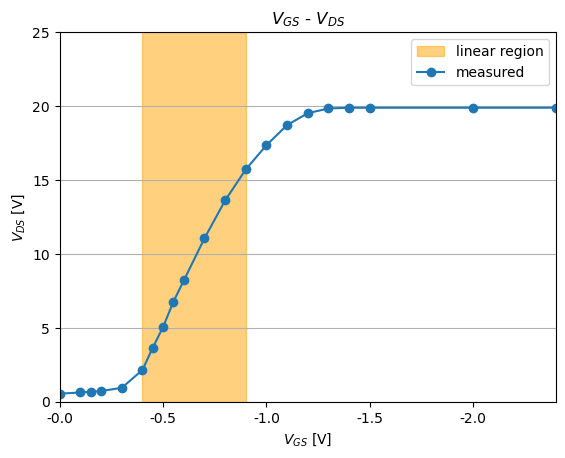

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(legend=True, xlabel="$V_{GS}$ [V]", grid="y", ylabel="$V_{DS}$ [V]", title="$V_{GS}$ - $V_{DS}$", xlim=(0, 2.4), ylim=(0, 25))
ax.axvspan(0.4, 0.9, color="orange", alpha=0.5, label="linear region")
ax.plot(data["V_GS"], data["V_DS"], marker="o", label="measured")
# axessetting.plot_func(ax, linear_approx(data["V_GS"], data["V_DS"], (0.4, 0.9), 0))
axessetting.apply_axes(ax)
ax.set_xticklabels(-ax.get_xticks())
print(linear_approx(data["V_GS"], data["V_DS"], (0.4, 0.9), 0, fmt="{slope: .2f}"))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


g_m = -1.37e-03


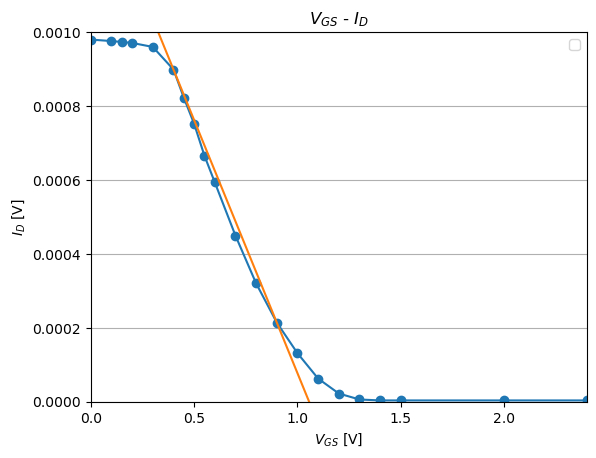

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(legend=True, xlabel="$V_{GS}$ [V]", grid="y", ylabel="$I_{D}$ [V]", title="$V_{GS}$ - $I_{D}$", xlim=(0, 2.4), ylim=(0, 1e-3))
ax.plot(data["V_GS"], data["I_D"], marker="o")
axessetting.plot_func(ax, linear_approx(data["V_GS"], data["I_D"], (0.4, 0.9), 0))
axessetting.apply_axes(ax)
print(linear_approx(data["V_GS"], data["I_D"], (0.4, 0.9), fmt="g_m = {slope: .2e}"))